## K-means

In [1]:
# import os
# os.environ['OMP_NUM_THREADS'] = 1 # 쓰레드를 1개만 사용하겠다. NUMPY 전에 사용해야함

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('KmeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [4]:
X = dataset.iloc[:,:].values#전체 로우 중에서 전체 컬럼을 다 가져옴
# X = dataset.vales
# X = dataset.to_numpy() 
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화(전체 데이터 분포 확인)

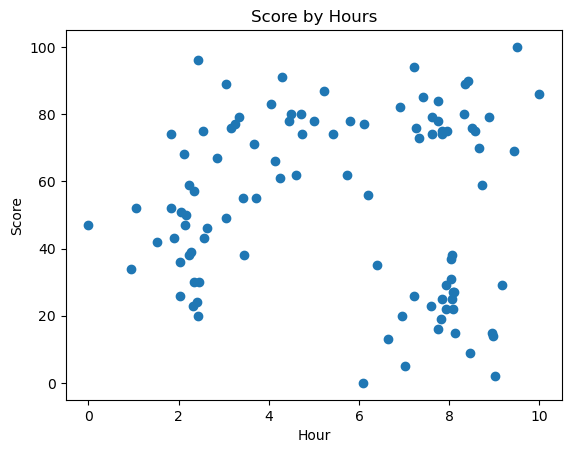

In [5]:
plt.scatter(X[:,0],X[:,1])  # X 축은 HOUR , Y축은 SCORE 
plt.title('Score by Hours')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

### 데이터 시각화(축 범위 통일)

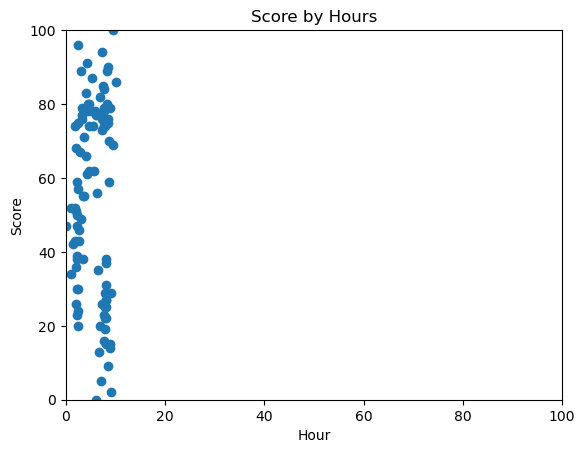

In [6]:
plt.scatter(X[:,0],X[:,1])  # X 축은 HOUR , Y축은 SCORE 
plt.title('Score by Hours')
plt.xlabel('Hour')
plt.xlim(0,100)
plt.ylabel('Score')
plt.ylim(0,100)
plt.show()

### 피처 스케일링 (Feature Scaling)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화(스케일링된 데이터)

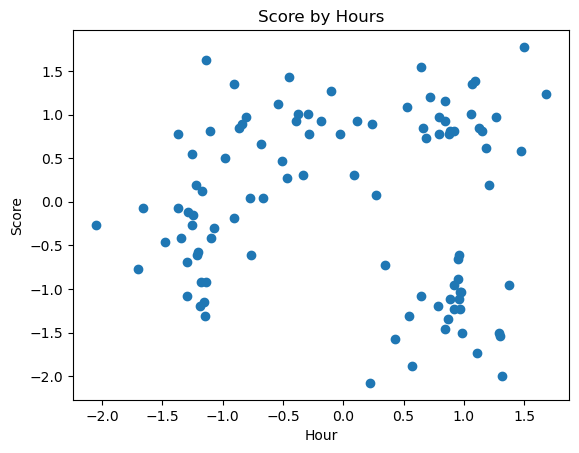

In [8]:
plt.scatter(X[:,0],X[:,1])  # X 축은 HOUR , Y축은 SCORE 
plt.title('Score by Hours')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

### 최적의 K값 찾기 (엘보우 방식 Elbow Method)

C:\Users\com\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\com\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\com\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\com\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

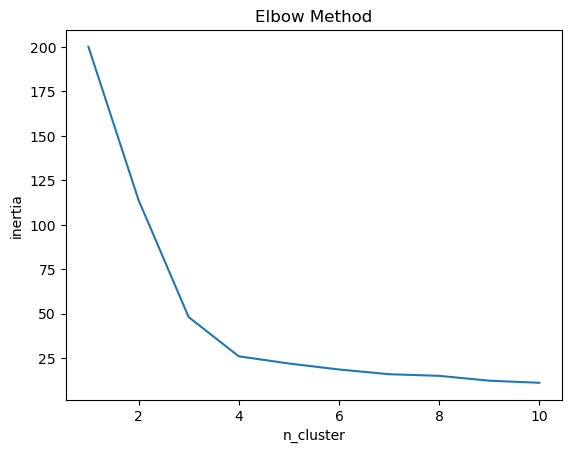

In [9]:
from sklearn.cluster import KMeans
inertia_list= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid)까지의 거리의 제곱의 합
    
plt.plot(range(1,11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show()

### 최적의 K 값(4)로 KMeans 학습

### K = 4 # Elbow Method 로 찾아낸 최적의 클러스트 값

In [10]:
K=4
kmeans = KMeans(n_clusters=K, n_init=10, random_state=0)
# kmeans.fit()
y_kmeans = kmeans.fit_predict(X) # X 데이터를 넣어서 학습을 하고 예측되는 데이터를 가져와서 반환해서 y_kmeans에 저장해줌

C:\Users\com\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 데이터 시각화(최적의 K)

In [13]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 centroid 좌표
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

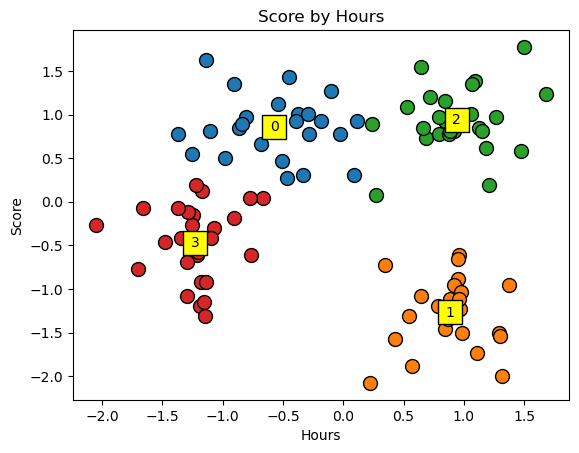

In [16]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black')
    plt.scatter(centers[cluster,0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 클러스터 좌표를 알아야함
    plt.text(centers[cluster,0], centers[cluster, 1], cluster, va='center', ha='center') # va / ha = allign / 클러스터 텍스트 출력
plt.title('Score by Hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

### 데이터 시각화(스케일링 원복)

In [18]:
X_org = sc.inverse_transform(X) # Feature Scaling 된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [20]:
centers_org = sc.inverse_transform(centers)
centers_org[:5]

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

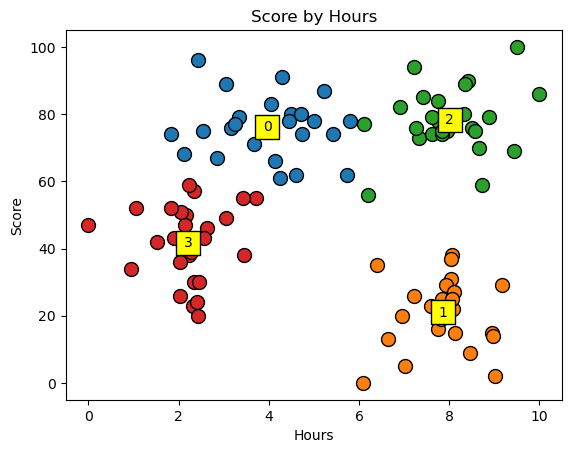

In [22]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black')
    plt.scatter(centers_org[cluster,0], centers_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 클러스터 좌표를 알아야함
    plt.text(centers_org[cluster,0], centers_org[cluster, 1], cluster, va='center', ha='center') # va / ha = allign
plt.title('Score by Hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()